In [2]:
import pandas as pd
colnames=['id', 'kode_sarana', 'kode_sarana_lama', 'id_kartu', 'id_jenis', 'id_sub_jenis', 'seri', 'tahun_dinas', 'id_daops', 'id_depo', 'status', 'negara_asal', 'tgl_uji_pertama', 'tgl_masa_uji', 'tgl_masa_perawatan', 'pabrikan', 'id_pemilik', 'created_at', 'last_update' ] 
datsar = pd.read_csv('data_source/tblsarana.csv', names=colnames)

datsar.head()

,id,kode_sarana,kode_sarana_lama,id_kartu,id_jenis,id_sub_jenis,seri,tahun_dinas,id_daops,id_depo,status,negara_asal,tgl_uji_pertama,tgl_masa_uji,tgl_masa_perawatan,pabrikan,id_pemilik,created_at,last_update
0,1,SR38401,MTT 2151,0,9,22,85,1984,16,43,Aktiv,NaN,0000-00-00,2020-02-14,0000-00-00,PLASSER AND THEURER,2,0000-00-00 00:00:00,0000-00-00 00:00:00
1,2,SU07501,HKPW,0,9,21,188,1975,18,49,Aktiv,NaN,0000-00-00,0000-00-00,0000-00-00,(kosong),2,0000-00-00 00:00:00,0000-00-00 00:00:00
2,3,SU39501,EM - 120,0,9,21,190,1995,8,20,Aktiv,NaN,0000-00-00,2021-08-19,0000-00-00,PLASSER AND THEURER,2,0000-00-00 00:00:00,0000-00-00 00:00:00
3,4,SC38301,HITACHI UDW 90,0,9,20,63,1983,26,66,Aktiv,NaN,0000-00-00,0000-00-00,0000-00-00,HITACHI,2,0000-00-00 00:00:00,0000-00-00 00:00:00
4,5,SC39301,GOTTWALD GS100.05,0,9,20,63,1993,26,48,Aktiv,NaN,0000-00-00,0000-00-00,0000-00-00,GOTTWALD,2,0000-00-00 00:00:00,0000-00-00 00:00:00


In [6]:
datsar_kci = datsar.loc[(datsar['id_jenis'] == 2) & (datsar['id_pemilik'] == 3)]

In [7]:
datsar_kci.head()

,id,kode_sarana,kode_sarana_lama,id_kartu,id_jenis,id_sub_jenis,seri,tahun_dinas,id_daops,id_depo,status,negara_asal,tgl_uji_pertama,tgl_masa_uji,tgl_masa_perawatan,pabrikan,id_pemilik,created_at,last_update
81,279,K118930,K110603/8929,0,2,3,0,2006,24,42,Aktiv,JEPANG,2009-12-28,2020-12-13,0000-00-00,TOKYO CORP,3,0000-00-00 00:00:00,0000-00-00 00:00:00
82,280,K118929,K110604/8825,0,2,3,0,2006,24,42,Aktiv,JEPANG,2009-12-28,2021-10-27,0000-00-00,TOKYO CORP,3,0000-00-00 00:00:00,0000-00-00 00:00:00
83,281,K118927,K110606/8909,0,2,3,0,2006,24,42,Aktiv,JEPANG,2009-12-28,2021-10-27,0000-00-00,TOKYO CORP,3,0000-00-00 00:00:00,0000-00-00 00:00:00
84,282,K118925,K110608/8504,0,2,3,0,2006,24,42,Aktiv,JEPANG,2009-12-28,2021-10-27,0000-00-00,TOKYO CORP,3,0000-00-00 00:00:00,0000-00-00 00:00:00
85,283,K118950,K110610/8708,0,2,3,0,2006,24,42,Tidak Aktiv,JEPANG,2009-12-28,2017-04-22,0000-00-00,TOKYO CORP,3,0000-00-00 00:00:00,0000-00-00 00:00:00


In [8]:
datsar_kci['id_pemilik'].unique()

array([3], dtype=int64)

In [9]:
datsar_kci.shape

(1244, 19)

In [10]:
jumlah_krl = datsar_kci.groupby(['status'])['kode_sarana'].count().reset_index()
print(jumlah_krl)

        status  kode_sarana
0        Aktiv         1150
1  Tidak Aktiv           94


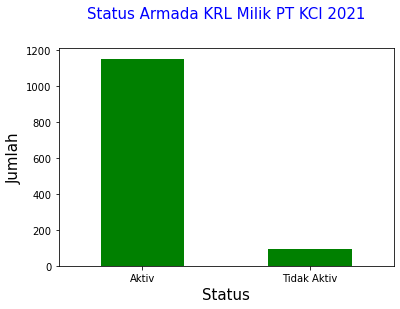

In [12]:
import matplotlib.pyplot as plt
plt.clf()
datsar_kci.groupby(['status'])['kode_sarana'].count().plot(kind='bar', color='green')
plt.title('Status Armada KRL Milik PT KCI 2021',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Jumlah',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

In [18]:
#df['titles'] = df['movie_title'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()
#df1['State_code'] = df1.State.str.extract(r'\b(\w+)$', expand=True)

datsar_kci['tahun_pembuatan'] = datsar_kci['kode_sarana'].str.extract(r' \d ({3,4})')
datsar_kci.head()

error: nothing to repeat at position 5